In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from shapely.geometry import MultiPoint
import os
import matplotlib.pyplot as plt

In [77]:
path_to_test_csv_out = '/Users/danielfisher/Projects/kcl-globalgasflaring/data/processed/merged_months/at1/1994'
df_files = os.listdir(path_to_test_csv_out)
df_list = [pd.read_csv(os.path.join(path_to_test_csv_out, f)) for f in df_files]

In [78]:
year_df = pd.concat(df_list, ignore_index=True)
year_df.shape

(3416692, 5)

In [79]:
coords = year_df.as_matrix(columns=['lats', 'lons'])

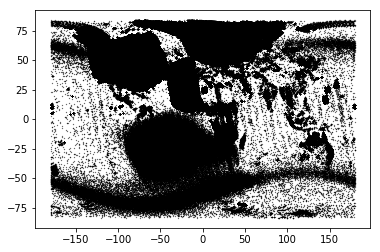

In [80]:
plt.plot(coords[:,1], coords[:,0], 'ko', markersize = 0.25)
plt.show()

In [81]:
lat_lon_tuples = zip(year_df.lats, year_df.lons)

In [82]:
unique_locations, indicies, unique_counts = np.unique(lat_lon_tuples, axis=0, return_inverse=True, return_counts=True)

In [83]:
print unique_locations.size
print indicies.size
print unique_counts.size

6519384
3416692
3259692


In [84]:
year_df['clusters'] = indicies
year_df['cluster_counts'] = unique_counts[indicies]

In [85]:
year_df = year_df[year_df['cluster_counts'] >= 4]

In [86]:
grouped_df = year_df.groupby('clusters').agg({'frp': np.mean, 'lats': np.mean, 'lons': np.mean})

In [88]:
grouped_df.shape

(5571, 3)

In [73]:
sub_coords = grouped_df.as_matrix(columns=['lats', 'lons'])

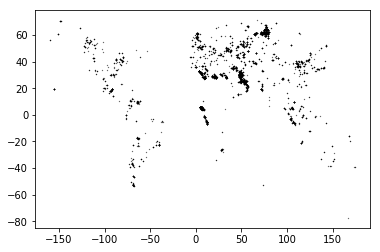

In [74]:
plt.plot(sub_coords[:,1], sub_coords[:,0], 'ko', markersize=0.25)
plt.show()